In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

### Question 16

In [2]:
Turns = np.array(['X','O'])
test_reward_lists_random_16 = []
test_reward_lists_optimal_16 = []
train_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for train_eps in train_epses:
    player1 = DQNPlayer(epsilon=train_eps, player=Turns[0])
    player2 = DQNPlayer(epsilon=train_eps, player=Turns[1])
    env16 = DQNlearningEnv(player1=player1, player2=player2)
    env16.set_testing()
    env16.train(20000)
    test_reward_lists_random_16.append(env16.test_avg_reward['random'])
    test_reward_lists_optimal_16.append(env16.test_avg_reward['optimal'])

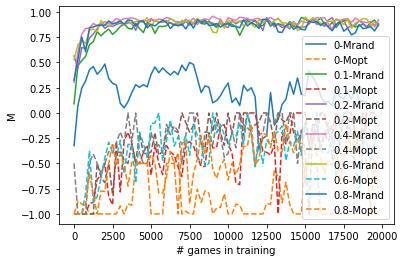

In [5]:
plt.figure()
for j in range(len(train_epses)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_16[j], linestyle='-', label=str(train_epses[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_16[j], linestyle='--', label=str(train_epses[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 17

In [3]:
Turns = np.array(['X','O'])
test_reward_lists_random_17 = []
test_reward_lists_optimal_17 = []
best_train_eps = 0.6 ## no effect, since we use set_decay_eps
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = DQNPlayer(epsilon=best_train_eps, player=Turns[0])
    player2 = DQNPlayer(epsilon=best_train_eps, player=Turns[1])
    env17 = DQNlearningEnv(player1=player1, player2=player2)
    env17.set_decay_eps(epoch_star=epoch_star)
    env17.set_testing()
    env17.train(20000)
    test_reward_lists_random_17.append(env17.test_avg_reward['random'])
    test_reward_lists_optimal_17.append(env17.test_avg_reward['optimal'])

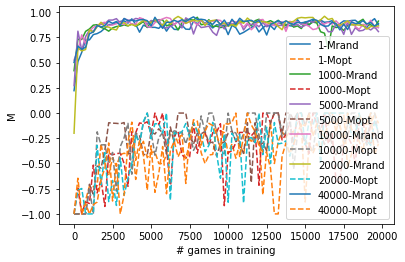

In [6]:
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(range(0, 20000, 250), test_reward_lists_random_17[j], linestyle='-', label=str(epoch_stars[j]) + "-Mrand")
    plt.plot(range(0, 20000, 250), test_reward_lists_optimal_17[j], linestyle='--', label=str(epoch_stars[j]) + "-Mopt")
plt.xlabel(f'# games in training')
plt.ylabel('M')
plt.legend()

### Question 18

In [18]:
print(max([max(it) for it in test_reward_lists_random_17]))
print(max([max(it) for it in test_reward_lists_optimal_17]))

0.96
0.0


### Question 19

In [4]:
Turns = np.array(['X','O'])
player1 = DQNPlayer(epsilon=0.6, player=Turns[0])
player2 = DQNPlayer(epsilon=0.6, player=Turns[1])
env19 = DQNlearningEnv(player1=player1, player2=player2)
env19.set_decay_eps(epoch_star=10000)
env19.set_testing()
env19.train(20000)

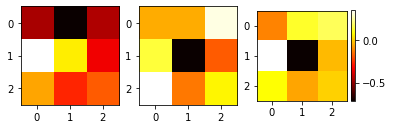

In [14]:
test_env = env19
test_env.reset_all()
def render_Q(grid, player="X"):
    moves = test_env.player1.empty(np.zeros((3,3))) # use method from Player class
    Q_show = np.zeros((3,3))
    for move in moves:
        Q_value = test_env.policy_net(grid2state(grid, player).to(test_env.device))
        Q_show[move] = Q_value[(0,pos_to_a(move))].item()
    return Q_show

grid1 = np.zeros((3,3))
grid2 = np.zeros((3,3))
grid3 = np.zeros((3,3))

grid2[(1,1)] = 1
grid3[(0,0)] = 1
grid3[(1,1)] = -1

Q_show1 = render_Q(grid1, player="X")
Q_show2 = render_Q(grid2, player="O")
Q_show3 = render_Q(grid3, player="X")


plt.subplot(1, 3, 1)
plt.imshow(Q_show1, cmap='hot')
plt.subplot(1, 3, 2)
plt.imshow(Q_show2, cmap='hot')
plt.subplot(1, 3, 3)
plt.imshow(Q_show3, cmap='hot')

plt.colorbar(fraction=0.046, pad=0.04)
plt.show()
